<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/ML_Gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [15]:
y=df['gender']
x=df.drop('gender',axis=1)

In [39]:
y

,gender
0,1
1,0
2,1
3,1
4,0
...,...
4996,0
4997,0
4998,0
4999,0


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.38719442, -1.24793291,  0.28397148, ..., -1.01592361,
         1.01389375,  1.00220198],
       [-2.58268182,  0.73938869, -1.00941773, ..., -1.01592361,
         1.01389375, -0.99780285],
       [-2.58268182, -1.24793291,  0.65351125, ...,  0.98432598,
         1.01389375,  1.00220198],
       ...,
       [ 0.38719442, -0.25427211, -0.45510807, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442,  0.01672629,  0.46874136, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442,  2.00404789, -1.00941773, ...,  0.98432598,
         1.01389375,  1.00220198]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [21]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.968031968031968

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       518
           1       0.97      0.96      0.97       483

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [32]:
confusion_matrix(y_test,y_pred)

array([[504,  14],
       [ 18, 465]])

<Axes: >

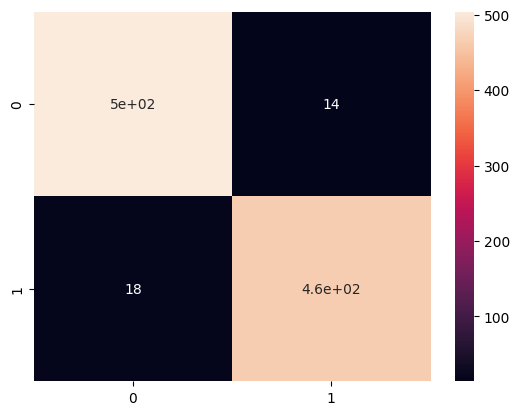

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [38]:
model.predict([[1,11.8,6.1,1,0,1,1]])

array([1])